# Customer Churn Analysis and Prediction


## Project Overview:
The project aims to analyze and predict customer churn in a telecommunications company with exploratory data analysis and machine learning. Customer churn, the phenomenon where customers cease their relationship with a company, is a crucial metric for businesses as it directly impacts revenue and profitability. By understanding the factors influencing churn, the company can develop strategies to retain customers and improve customer satisfaction.

## Objective:
The project seeks to analyze the dataset, extract insights, and propose actionable strategies to mitigate customer attrition, followed by building 4 machine learning models for churn prediction. The ML algorithms used are Logistic Regression, Decision Tree, Random Forest, and XGBoost. In the end, I compare these models to identify the most effective approach for predicting churn.

## Feature Descriptions:
Customer Demographic info:
* `Gender` - Whether the customer is a male or a female
* `SeniorCitizen` - Whether the customer is a senior citizen or not (1, 0)
* `Partner` - Whether the customer has a partner or not  (Yes, No)
* `Dependents` - Whether the customer has dependents or not  (Yes, No)

Service Subscriptions' info:
* `PhoneService` - Whether the customer has a phone service or not  (Yes, No)
* `MultipleLines` - Whether the customer has multiple lines or not (Yes, No, No phone service)
* `InternetService` - Customer’s internet service provider  (DSL, Fiber optic, No)
* `OnlineSecurity` - Whether the customer has online security or not (Yes, No, No internet service)
* `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service)
* `DeviceProtection` - Whether the customer has device protection or not (Yes, No, No internet service)
* `TechSupport` - Whether the customer has tech support or not (Yes, No, No internet service)
* `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service)
* `StreamingMovies` - Whether the customer has streaming movies or not (Yes, No, No internet service)

Customer Account info:
* `Tenure` - Number of months the customer has stayed with the company
* `Contract` - The contract term of the customer (Month-to-month, One year, Two year)
* `PaperlessBilling` - Whether the customer has paperless billing or not (Yes, No)
* `PaymentMethod` - The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)
* `MonthlyCharges` - The amount charged to the customer monthly
* `TotalCharges` - The total amount charged to the customer
* `Churn` - Whether the customer churned or not (Yes or No)


In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis=1, inplace=True)

In [4]:
df.shape

(7043, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


`TotalCharges` needs to be converted to float64 and `SeniorCitizen` to object type

In [6]:
#replace empty strings or whitespace with NaN
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', pd.NA, regex=True)

In [7]:
#convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
#filling missing values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [10]:
#changing dtype from int as this column is categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

### Encoding Categorical Variables

In [11]:
df_cat = df.select_dtypes(include="object")

In [12]:
for col in df_cat.columns:
  print(col, df[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


One Hot Encoding since the values are nominal.

In [13]:
#initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

df_cat_encoded = ohe.fit_transform(df_cat)

# convert the encoded data to a DataFrame
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=ohe.get_feature_names_out())
df_cat_encoded.head()

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [14]:
df_num = df.select_dtypes(include=['number'])
df_num.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [15]:
df = pd.concat([df_num, df_cat_encoded], axis=1)

In [16]:
df.head(3)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,29.85,29.85,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [17]:
df.drop('Churn_No', axis=1, inplace=True)
df.rename(columns={'Churn_Yes':'Churn'}, inplace=True)

# Exploratory Data Analysis

### Analyzing Customer Loyalty: Tenure Distribution

Visualizing the distribution of tenure among churned and non-churned customers

In [31]:
colors = {'No': 'skyblue', 'Yes': 'coral', 0: 'skyblue', 1: 'coral'}

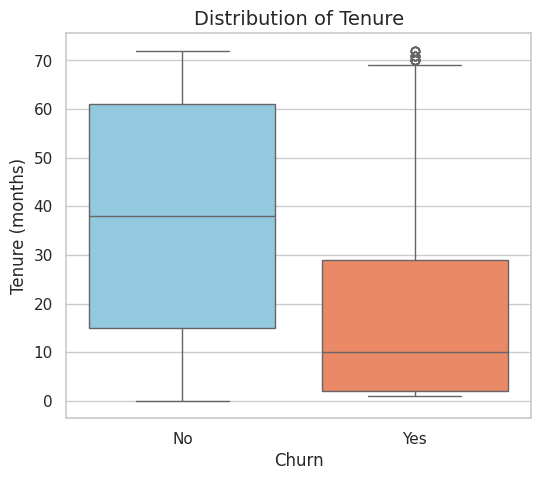

In [105]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,5))
sns.boxplot(x='Churn', y='tenure', hue='Churn', data=df, palette=colors, legend=False)
plt.title('Distribution of Tenure', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Tenure (months)', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=11)

plt.show()

#### Insights
This indicates that customers who have been with the company for a shorter period may be more likely to churn.

### Analyzing the Impact of Charges on Customer Attrition

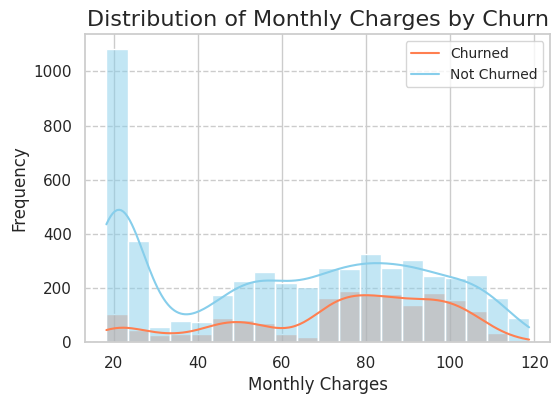

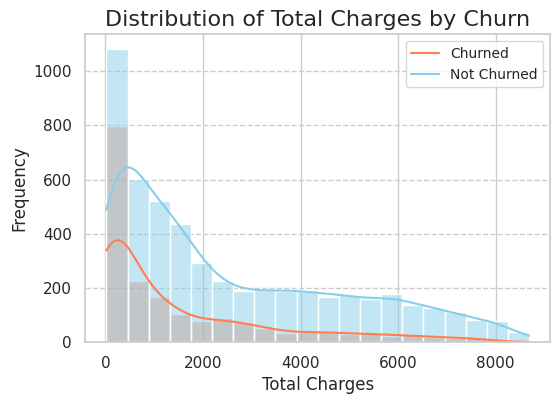

In [60]:
sns.set(style="whitegrid")

#visualizing MonthlyCharges
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=20, palette=colors)
plt.title('Distribution of Monthly Charges by Churn', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10, labels=['Churned', 'Not Churned'])
plt.grid(axis='y', linestyle='--')
plt.show()

#visualizing TotalCharges
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, bins=20, palette=colors)
plt.title('Distribution of Total Charges by Churn', fontsize=16)
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10, labels=['Churned', 'Not Churned'])
plt.grid(axis='y', linestyle='--')
plt.show()

#### Insights
Monthly Charges - The highest churn rates occur within the range of 70 to 100, indicating that customers with monthly charges in this range are more likely to churn.
* This suggests that customers who are paying relatively high monthly fees may be more sensitive to pricing and value perception, potentially seeking better deals or finding the current service less satisfactory.

Total Charges - The churn is strikingly high at the beginning of the range and then gradually lowers.
* This pattern suggests that newly acquired customers, who have just started their service and hence have lower total charges, are more likely to churn. It could be due to factors such as dissatisfaction with the service, unmet expectations, or better offers from competitors.
* As customers continue their service and accumulate higher total charges, their likelihood of churning decreases, indicating that longer-tenured customers are more loyal or satisfied with the service.

### Analyzing Demographic and Relationship Influences

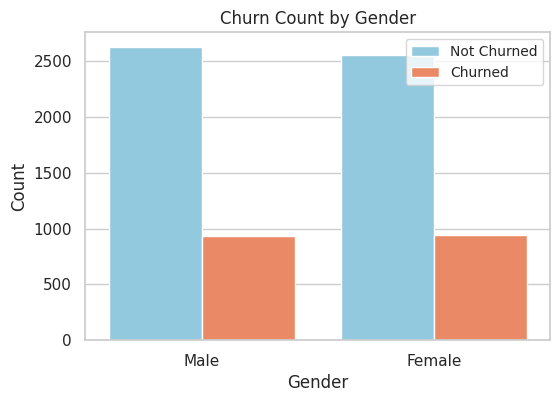

In [87]:
#visualizing Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender_Female', hue='Churn', palette=colors)
plt.title('Churn Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Not Churned','Churned'], fontsize=10, loc='upper right')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

#### Insights
Gender does not seem to have an impact on attrition.

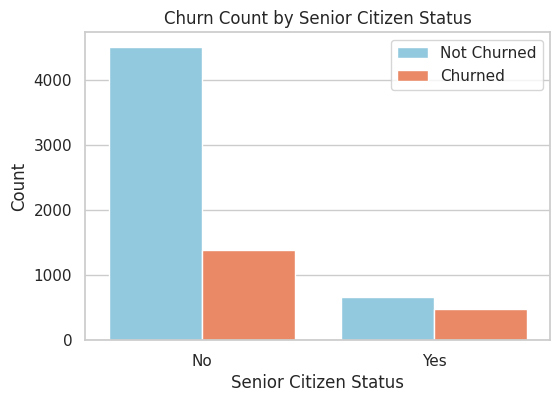

In [101]:
#visualizing SeniorCitizen
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='SeniorCitizen_1', hue='Churn', palette=colors)
plt.title('Churn Count by Senior Citizen Status')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Count')
plt.legend(labels=['Not Churned', 'Churned'], loc='upper right')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Insights

* Younger customers exhibit a significantly better retention rate compared to elderly customers, indicating that younger customers are less likely to churn.
* The churn ratio (the proportion of churned customers relative to the total) is much higher within the senior citizen group compared to younger citizens. This indicates that senior citizens require special attention in terms of churn prevention strategies.

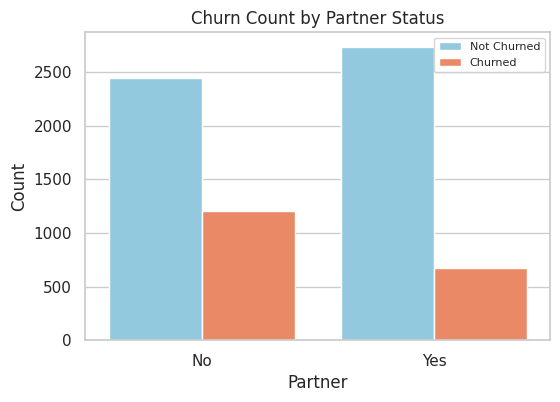

In [102]:
#visualizing Partner status
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Partner_Yes', hue='Churn', palette=colors)
plt.title('Churn Count by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.legend(labels=['Not Churned', 'Churned'], fontsize=8, loc='upper right')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Insights

* The presence of a partner does not seem to strongly influence churn rates. However, a customer with a partner may be less likely to churn.

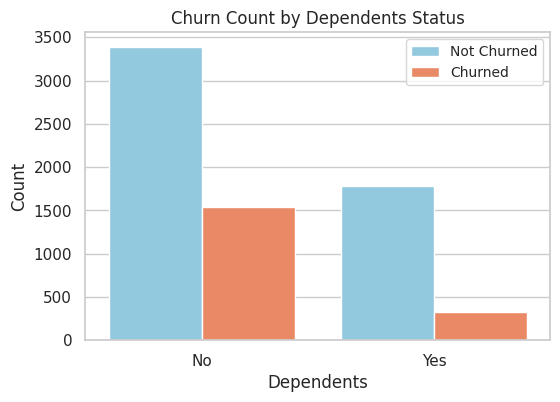

In [103]:
#visualizing Dependents
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents_Yes', hue='Churn', palette=colors)
plt.title('Churn Count by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.legend(labels=['Not Churned', 'Churned'], fontsize=10)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Insights
* This suggests that customers with dependents have stronger ties to the service and thus lower churn rates. Efforts can be made to attract more customers with families.
* Customers without dependents churn at a high rate possibly due to flexible decision-making, changing needs, and lack of commitment. To retain them, personalized deals, better customer support, value-added services, long-term rewards can be offered.


## Machine Learning: Logistic Regression

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
logreg = LogisticRegression(max_iter=10000, random_state=42)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
#evalution
print(classification_report(y_test, y_pred, labels=[0, 1])) #where 1 refers to a Churned Customer

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1282
           1       0.68      0.58      0.63       479

    accuracy                           0.81      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.81      0.81      1761



Since the data is imbalanced, a combination of oversampling (using SMOTE) and undersampling (using ENN) would improve the distribution of the labels.

In [ ]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [ ]:
y_resampled.value_counts()

Churn
1.0    3236
0.0    2639
Name: count, dtype: int64

Retraining the Model

In [ ]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled,test_size=0.25, random_state=42)

In [ ]:
logreg.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = logreg.predict(X_test_resampled)

In [ ]:
print(classification_report(y_test_resampled, y_pred_resampled, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       664
           1       0.92      0.93      0.92       805

    accuracy                           0.91      1469
   macro avg       0.91      0.91      0.91      1469
weighted avg       0.91      0.91      0.91      1469



It can be observed that all metrics have improved after resampling.

In [ ]:
#AUC score
y_pred_proba = logreg.predict_proba(X_test_resampled)[::,1] #probability of the positive class, i.e, Churned customer
auc_logreg = roc_auc_score(y_test_resampled, y_pred_proba)
auc_logreg

0.9719168599865299

The AUC score is 0.97 which is also indicative of a well-performing model with high discriminatory ability in separating the positive and negative classes.

## Machine Learning: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", max_depth=6, min_samples_leaf=8, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test_resampled)

In [ ]:
print(classification_report(y_test_resampled, y_pred_dt, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       664
           1       0.93      0.95      0.94       805

    accuracy                           0.93      1469
   macro avg       0.93      0.93      0.93      1469
weighted avg       0.93      0.93      0.93      1469



In [ ]:
#AUC score
y_pred_proba = dt.predict_proba(X_test_resampled)[::,1]
auc_dt = roc_auc_score(y_test_resampled, y_pred_proba)
auc_dt

0.9744649405073711

## Machine Learning: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, min_samples_leaf=8, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test_resampled)

In [ ]:
print(classification_report(y_test_resampled, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       664
           1       0.94      0.95      0.94       805

    accuracy                           0.94      1469
   macro avg       0.94      0.94      0.94      1469
weighted avg       0.94      0.94      0.94      1469



In [ ]:
#AUC score
y_pred_proba = rf.predict_proba(X_test_resampled)[::,1]
auc_rf = roc_auc_score(y_test_resampled, y_pred_proba)
auc_rf

0.9816424081418842

## Machine Learning: XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xg = xg.predict(X_test_resampled)

In [ ]:
print(classification_report(y_test_resampled, y_pred_xg, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       664
           1       0.96      0.96      0.96       805

    accuracy                           0.96      1469
   macro avg       0.96      0.96      0.96      1469
weighted avg       0.96      0.96      0.96      1469



In [ ]:
#AUC score
y_pred_proba = xg.predict_proba(X_test_resampled)[::,1]
auc_xg = roc_auc_score(y_test_resampled, y_pred_proba)
auc_xg

0.9909096011374692

# Comparison of Models

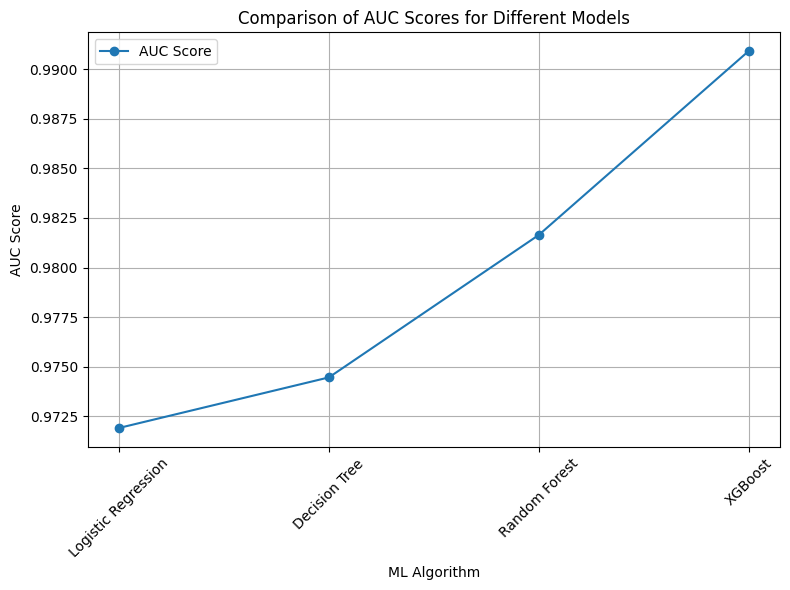

In [ ]:
ml_algos = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
auc_scores = [auc_logreg, auc_dt, auc_rf, auc_xg]

plt.figure(figsize=(8, 6))

plt.plot(ml_algos, auc_scores, marker='o', label='AUC Score')

plt.xlabel('Machine Learning Algorithms')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores for Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The pattern in difference in the models' AUC scores suggests that more complex models can capture intricate patterns in the data, leading to higher discriminatory ability and score. Notably, the highest-scoring models (Random Forest and XGBoost) employ ensemble learning.

<ipython-input-112-b8e4e1f83e5d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=10)


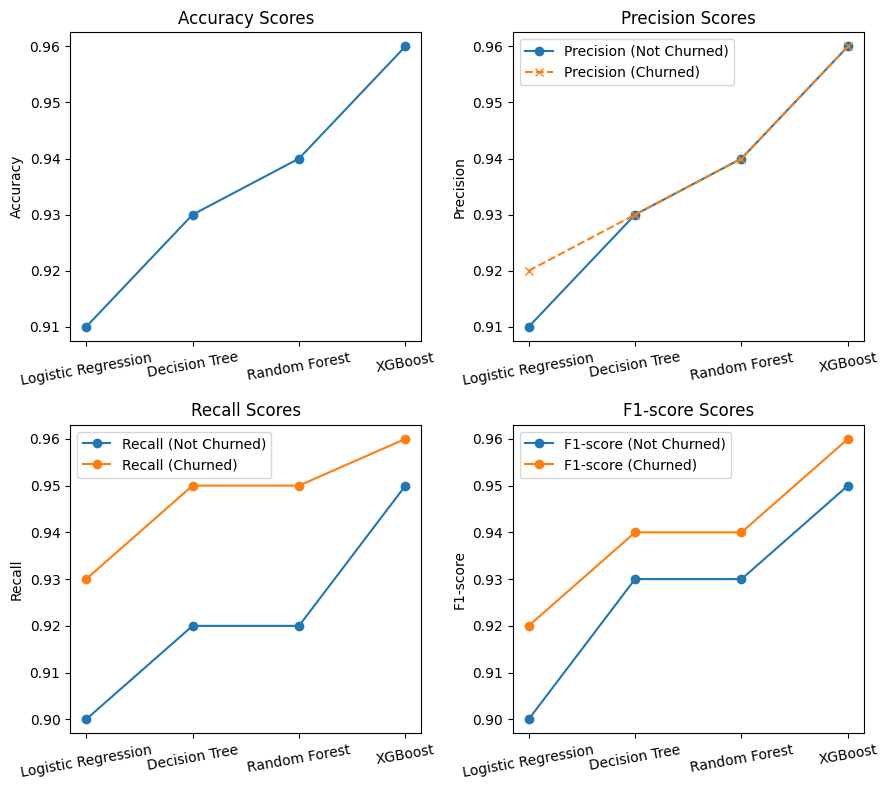

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [0.91, 0.93, 0.94, 0.96]
precision_scores_class_0 = [0.91, 0.93, 0.94, 0.96]
precision_scores_class_1 = [0.92, 0.93, 0.94, 0.96]
recall_scores_class_0 = [0.90, 0.92, 0.92, 0.95]
recall_scores_class_1 = [0.93, 0.95, 0.95, 0.96]
f1_scores_class_0 = [0.90, 0.93, 0.93, 0.95]
f1_scores_class_1 = [0.92, 0.94, 0.94, 0.96]

fig, axs = plt.subplots(2, 2, figsize=(9, 8))

#accuracy
axs[0, 0].plot(models, accuracy_scores, marker='o')
axs[0, 0].set_title('Accuracy Scores')
axs[0, 0].set_ylabel('Accuracy')

#precision
axs[0, 1].plot(models, precision_scores_class_0, marker='o', label='Precision (Not Churned)')
axs[0, 1].plot(models, precision_scores_class_1, marker='x', linestyle='--', label='Precision (Churned)')
axs[0, 1].set_title('Precision Scores')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

#recall
axs[1, 0].plot(models, recall_scores_class_0, marker='o', label='Recall (Not Churned)')
axs[1, 0].plot(models, recall_scores_class_1, marker='o', label='Recall (Churned)')
axs[1, 0].set_title('Recall Scores')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

#F1 score
axs[1, 1].plot(models, f1_scores_class_0, marker='o', label='F1-score (Not Churned)')
axs[1, 1].plot(models, f1_scores_class_1, marker='o', label='F1-score (Churned)')
axs[1, 1].set_title('F1-score Scores')
axs[1, 1].set_ylabel('F1-score')
axs[1, 1].legend()


for ax in axs.flat:
    ax.set_xticklabels(models, rotation=10)

plt.tight_layout()
plt.show()

Similiar trend can be observed using all the evaluation metrics with more complex models performing better.